<a href="https://colab.research.google.com/github/raqueeb/Dockerfile/blob/master/tf2_transfer_learning_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  ট্রান্সফার লার্নিং এবং ‘প্রি-ট্রেইনড’ অক্সফোর্ড ইউনিভার্সিটি’র ভিজ্যুয়াল জিওমেট্রি গ্রূপের vgg16 ডাটাসেট

মানুষের মধ্যেই সবচেয়ে বেশি ট্রান্সফার লার্নিং ব্যাপারটা লক্ষ্য করা যায়। যেমন, আমরা একটা জিনিস শিখি তবে সেই জিনিসটা যে অন্য কোন কাজে লাগে না সেটা একদম ঠিক নয়। ধরা যাক, এক সময় আমি অংক, অ্যালজেবরা শিখেছি, পাশাপাশি পরিসংখ্যান শিখেছি পরীক্ষায় পাশ করার জন্য। এখন সেই জ্ঞানগুলো ট্রান্সফার হয়েছে মেশিন লার্নিং শিখতে গিয়ে। অংক,অ্যালজেবরা এবং পরিসংখ্যান শেখাটা বৃথা যায়নি। কারণ, আমাকে মেশিন লার্নিং একেবারে কেঁচে গণ্ডূষ করে শুরু করতে হয়নি, কারণ অংক এবং পরিসংখ্যান পাশাপাশি অ্যালজেবরা এই মেশিন লার্নিং শেখার জন্য সাহায্য করেছে। সে কারণেই বলা হয় যদিও একটা কাজের জন্য আমরা কোন কিছু শিখি, দেখা যায় পরে ওই শেখাটা অন্য কাজে লাগছে। এর অর্থ হচ্ছে আমরা অতীতে যা কিছু শিখেছি সেটা এখন কাজে লাগছে নতুন কিছু শিখতে। সেখানে এক ডোমেইন থেকে আরেক ডোমেইনে জ্ঞানটা ট্রান্সফার হচ্ছে।

ছোটবেলায় সাইকেল চালানো শিখেছিলাম বলেই মোটরসাইকেল ধরতে খুব একটা সমস্যা হয়নি। আবার কেউ যদি মোটরসাইকেল চালাতে পারেন তাহলে তার জন্য গাড়ি চালানোর শুরুর ব্যাপারগুলো ধরতে সে রকম সমস্যা হবার কথা না। বাচ্চারা যখন কোন মোবাইল ডিভাইস ব্যবহার করা শেখে, তারা হঠাৎ করে আইপ্যাড পেলে তাদের পুরনো জ্ঞান দিয়েই চালিয়ে নেয় নতুন জিনিস। এর অর্থ হচ্ছে একটার নলেজ আরেকটাতে ট্রান্সফার করা যাচ্ছে। এই একই জিনিস ঘটছে ডিপ লার্নিং এর আরেকটা নতুন ধারণায়। ‘ট্রান্সফার লার্নিং’। একটা কাজে একটা মডেলকে ট্রেইন করা হলে সেটাকে যে পাশাপাশি আর একটা কাজে ব্যবহার করা যাবে না সেটা ঠিক নয়। আমরা একটা ডিপ লার্নিং মডেলকে যদি ‘ইমেজ’ রিলেটেড ব্যাপারে ট্রেনিং করাই, তাহলে ওই কাজের কাছাকাছি আরেকটা কাজে ব্যবহার করা যাবে। ওই দুটো কাজের মধ্যে যত ‘সিমিলারিটি’ আছে ততোই মডেল গুলোর মধ্যে লার্নিং গুলোকে ট্রান্সফার করা সহজ হবে। শুরুতে একটা কাজের জন্য আমরা একদম গোড়া থেকে ট্রেইনিং করলেও পরের কাছাকাছি সেই কাজের জন্য একদম গোড়া থেকে ট্রেনিং করানোর প্রয়োজন নেই। এটাই ট্রান্সফার লার্নিং।

গোড়ার দিকে মেশিন লার্নিং এবং ডিপ লার্নিং অ্যালগরিদমগুলোকে এমনভাবে তৈরি করা হয়েছিল যাতে সে একটা স্পেসিফিক কাজ করতে পারে। আবার এই মডেলগুলোকে একেবারে গোড়া থেকে তৈরি করতে হতো যখন তাদের ফিচার স্পেস ডিস্ট্রিবিউশনে কোন পরিবর্তন আসতো। এখন দেখা যাচ্ছে ফিচার স্পেসে পরিবর্তন আসলেও কাছাকাছি কাজে একটার লার্নিং আরেকটাতে পাঠানো যাচ্ছে। সে কারণে আমরা গত চ্যাপ্টারে আলাপ করেছি ‘প্রি-ট্রেইনড’ মডেল নিয়ে। ‘প্রি-ট্রেইনড’ মডেল হচ্ছে একটা ‘স্টোরকৃত’ বা ‘সেভকৃত’ মডেল যাকে আগেই ট্রেনিং করানো হয়েছিল বিশাল আরেকটা ডাটাসেটের উপর। আমরা সেই মডেলকে অন্য আরেকটা কাজে সরাসরি অথবা ‘ট্রান্সফার লার্নিং’ এর মাধ্যমে আগের মডেলের পুরো বা কিছু অংশ নিয়ে নতুন মডেলকে কাস্টমাইজ করবো। আমাদের ‘প্রি-ট্রেইনড’ মডেল যদি কোটি কোটি ইমেজের উপর ট্রেনিং করানো থাকে, তাহলে সেই মডেলকে দিয়ে নতুন কাজে ওই ছবিগুলোর ‘লার্নিং’ ব্যবহার করা যাবে। ‘ট্রান্সফার লার্নিং’ এর সবচেয়ে বড় ব্যবহার হচ্ছে যখন আমাদের হাতে পর্যাপ্ত ডাটা থাকে না ট্রেনিং করানোর জন্য। সেই জ্ঞানকে নিয়ে আসছি আগের  প্রি-ট্রেইনড মডেলের প্রাপ্ত জ্ঞান থেকে। 

ধরা যাক আমাদের কাছে একটা ‘প্রি-ট্রেইনড’ মডেল আছে যেগুলো প্রায় ১০০০ ছবি ক্যাটাগরিতে কাজ করেছে। এখন আমার নতুন কাজে যেখানে মাত্র দুটো ছবির ক্যাটাগরি নিয়ে কাজ করছি সেখানে আগের একটা ‘প্রি-ট্রেইনড’ মডেল কোন রকম পরিবর্তন ছাড়াই ব্যবহার করা যায়। আসল কথা হচ্ছে আমাদের ডিপ লার্নিং মডেলগুলো যে ফিচার ম্যাপ তৈরি করে - সেগুলোকে নতুন কাজে আবার গোড়া থেকে ‘ফিচার ম্যাপ’ তৈরি না করে শেষে ক্লাসিফায়ার অংশটুকু ফেলে দিয়ে নতুন ক্লাসিফায়ার যোগ করলেই কাজ হয়ে যায়। মানে একজনের শরীর, আরেকজনের মাথা। মজার কথা, জিনিসটা কাজ করে।

In [0]:
try:
  # শুধুমাত্র টেন্সর-ফ্লো ২.x ব্যবহার করবো 
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
keras = tf.keras

TensorFlow 2.x selected.


In [0]:
# কিছু হেল্পার লাইব্রেরি ব্যবহার করছি

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pylab as plt

In [0]:
# টেন্সর-বোর্ড ব্যবহার করছি, এক্সটেনশন এবং লগ ডিরেক্টরি দেখিয়ে দিচ্ছি

%load_ext tensorboard
LOG_DIR = './log'

In [0]:
# আগের মতো বিড়াল এবং কুকুরের ডেটাসেট নিয়ে কাজ করছি, দেখে নিন 'গ্লোবাল এভারেজ পুলিং' 
# বিস্তারিত বলেছি আগের চ্যাপ্টারে, স্প্লিট হচ্ছে ৮০ ট্রেনিং, ১০ ভ্যালিডেশন, ১০ টেস্টসেট শতাংশে

split = (80, 10, 10)
splits = tfds.Split.TRAIN.subsplit(weighted=split)

(cat_train, cat_valid, cat_test), info = tfds.load('cats_vs_dogs', split=list(splits), with_info=True, as_supervised=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/2.0.1. Subsequent calls will reuse this data.


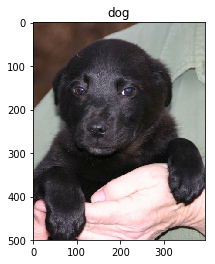

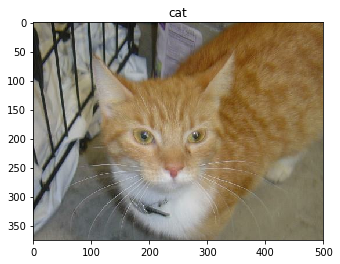

In [0]:
# একটু দেখি ডেটাসেটে কি আছে?

get_label_name = info.features['label'].int2str
for image, label in cat_test.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))
  image_ = image

In [0]:
# এই অবজেক্টগুলো (ইমেজ, লেবেল) জোড়ায় আছে, শেপ, ৩ চ্যানেল এবং লেবেল স্কেলারে আছে

print(cat_train)
print(cat_valid)
print(cat_test)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [0]:
# ইমেজ প্রি-প্রসেস করছি, ১৬০ পিক্সেলে

# IMAGE_SIZE = 100
# def pre_process_image(image, label):
# image = tf.cast(image, tf.float32)
# image = image / 255.0
# image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
# return image, label

IMAGE_SIZE = 160 

def pre_process_image(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
  return image, label

In [0]:
# এই একই ফাংশনকে ব্যবহার করছি ডেটাসেটের প্রতিটা আইটেম নিয়ে, ম্যাপ মেথডে 

# TRAIN_BATCH_SIZE = 64
# cat_train = cat_train.map(pre_process_image).shuffle(1000).repeat().batch(TRAIN_BATCH_SIZE)
# cat_valid = cat_valid.map(pre_process_image).repeat().batch(1000)

# কিভাবে 'শাফল' করবে এবং ব্যাচ সাইজও বলে দিচ্ছি

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

cat_train = cat_train.map(pre_process_image)
cat_valid = cat_valid.map(pre_process_image)
cat_test = cat_test.map(pre_process_image)

In [0]:
# আলাদাভাবে প্রতিটা ব্যাচ

train_batches = cat_train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = cat_valid.batch(BATCH_SIZE)
test_batches = cat_test.batch(BATCH_SIZE)

In [0]:
# ব্যাচ, ইমেজ সাইজ, ইমেজ সাইজ, কালার চ্যানেল

for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 160, 160, 3])

## একটা কনভলিউশন বেইজ, আরেকটা ক্লাসিফায়ার হেড

একটা ‘কনভলিউশনাল নিউরাল’ নেটওয়ার্কে কি আছে? একটা কনভলিউশন বেইজ, আরেকটা ক্লাসিফায়ার হেড। বেশিরভাগ সময় ‘প্রি-ট্রেইনড’ মডেলের কনভলিউশন বেইজ ঠিক রেখে নতুন কাজের নতুন ক্লাসিফায়ার হেড যোগ করলেই ট্রান্সফার লার্নিং এর ব্যবহার দেখতে পারি সহজেই। ট্রান্সফার লার্নিং এর শুরুতেই আমাদের আগের অন্য কাজের জন্য তৈরি মডেলকে ব্যবচ্ছেদ করবো আমরা। তখন বুঝব সেই ‘প্রি-ট্রেইনড’ মডেলের কতটুকু আমরা ‘আনকোরা’ ব্যবহার করব আর কতটুকু নতুন করে ট্রেইন করে নেব সেটা হাতেকলমে দেখবো সামনে। 

অনেক গল্প হল, এই মুহূর্তে আমরা একটা  ‘প্রি-ট্রেইনড’  মডেলের কিভাবে কাস্টমাইজেশন করব সেটা নিয়ে আলাপ করছি এখানে।  

In [0]:
# মডেলের মাথা

head = tf.keras.Sequential()
head.add(layers.Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
head.add(layers.BatchNormalization())
head.add(layers.Activation('relu'))
head.add(layers.MaxPooling2D(pool_size=(2, 2)))

head.add(layers.Conv2D(32, (3, 3)))
head.add(layers.BatchNormalization())
head.add(layers.Activation('relu'))
head.add(layers.MaxPooling2D(pool_size=(2, 2)))

head.add(layers.Conv2D(64, (3, 3)))
head.add(layers.BatchNormalization())
head.add(layers.Activation('relu'))
head.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [0]:
# average_pool = tf.keras.Sequential()
# average_pool.add(layers.AveragePooling2D())
# average_pool.add(layers.Flatten())
# average_pool.add(layers.Dense(1, activation='sigmoid'))

# গ্লোবাল এভারেজ পুল, এর কাজ হচ্ছে ফিচারগুলোকে একটা ১২৮০ এলিমেন্ট ভেক্টরে কনভার্ট করবে প্রতিটা ইমেজে
average_pool = tf.keras.layers.GlobalAveragePooling2D()
# একটা করে প্রেডিকশন প্রতিটা ইমেজে, এক্টিভেশন ফাংশন দরকার নেই, যেহেতু পজিটিভ সংখ্যা ১, নেগেটিভ সংখ্যা ০
prediction = keras.layers.Dense(1)

১. ‘প্রি-ট্রেইনড’ মডেল থেকে ফিচার এক্সট্রাকশন: আমরা রিপ্রেজেন্টেশন লার্নিং এর মাধ্যমে আগের নেটওয়ার্ক থেকে শিখে সেটা দিয়ে নতুন নেটওয়ার্কের দরকারি ফিচারগুলোকে এক্সট্রাক্ট করব নতুন ডাটা থেকে। এর শেষে আমরা একটা নতুন ক্লাসিফায়ার হেড যোগ করে দেব যাকে ট্রেনিং করালেই বাকি মডেলকে আনকোরা রাখলেও কাজ হয়ে যাবে। এর অর্থ হচ্ছে আমাদের আগের  প্রি-ট্রেইনড মডেলকে ব্যবহার করছি নতুন একটা কাজে। আমরা কিন্তু পুরো মডেলকে ট্রেইন করছিনা, শুধুমাত্র দরকারি ক্লাসিফায়ার হেডকে সেই কয়েকটা ক্লাসিফিকেশন কাজের জন্য ট্রেইন করলেই চলছে। পেছনে আগের মডেলের কনভলিউশন বেইজ একই থাকছে। মানে এক নেটওয়ার্ক থেকে কনভলিউশন বেইজ এবং নতুন কাজের নেটওয়ার্ক ক্লাসিফায়ার হেড (নতুন কাজের শেষ অংশ) যোগ করে দিলেই কাজ হয়ে যাবে।

In [0]:
# তিনটা জিনিস যোগ করে মডেল তৈরি
standard_model = tf.keras.Sequential([
    head, 
    average_pool,
    prediction
])

In [0]:
# মাত্র ২টা ক্লাস, সেকারণে লস 'binary_crossentropy'

# standard_model.compile(optimizer=tf.keras.optimizers.Adam(),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

base_learning_rate = 0.0001
standard_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# টেন্সর-বোর্ডে দেখবো না? আগে আলাপ করেছি

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./log/standard_model', update_freq='batch')]

In [0]:
# আমাদের ছবিগুলোকে গুনে নেই ট্রেইন, ভ্যালিডেশন এবং টেস্টসেটের জন্য

# standard_model.fit(cat_train, steps_per_epoch = 23262//TRAIN_BATCH_SIZE, epochs=7, 
#               validation_data=cat_valid, validation_steps=10, callbacks=callbacks)

num_train, num_val, num_test = (
  info.splits['train'].num_examples*weight/10
  for weight in split
)

In [0]:
# শুরুর ইপক এবং প্রতিটা ইপকের স্টেপ বলে দেই

initial_epochs = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = standard_model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 6s 285ms/step - loss: 1.2152 - accuracy: 0.5125


In [0]:
# ধারণা করি শুরুর অ্যাক্যুরেসি আর লসের অংক

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.22
initial accuracy: 0.51


In [0]:
# মডেল ট্রেনিং, ব্যাচে, স্ট্যান্ডার্ড মডেল, ট্রান্সফার লার্নিং ছাড়া
# কলব্যাক, টেন্সরবোর্ডের জন্য

history = standard_model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches,
                    callbacks=callbacks)

Epoch 1/10
      1/Unknown - 5s 5s/step - loss: 2.6915 - accuracy: 0.5625WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.235030). Check your callbacks.


      2/Unknown - 5s 3s/step - loss: 2.1321 - accuracy: 0.4688WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.228094). Check your callbacks.


582/582 [==============================] - 101s 174ms/step - loss: 0.6875 - accuracy: 0.6331 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
582/582 [==============================] - 97s 167ms/step - loss: 0.6353 - accuracy: 0.6803 - val_loss: 0.6358 - val_accuracy: 0.7043
Epoch 3/10
582/582 [==============================] - 97s 166ms/step - loss: 0.6132 - accuracy: 0.7012 - val_loss: 0.5828 - val_accuracy: 0.7237
Epoch 4/10
582/582 [==============================] - 96s 165ms/step - loss: 0.6060 - accuracy: 0.7082 - val_loss: 0.7234 - val_accuracy: 0.6552
Epoch 5/10
582/582 [==============================] - 96s 166ms/step - loss: 0.6055 - accuracy: 0.7168 - val_loss: 0.6674 - val_accuracy: 0.6901
Epoch 6/10
582/582 [==============================] - 97s 167ms/step - loss: 0.5945 - accuracy: 0.7251 - val_loss: 0.5868 - val_accuracy: 0.7366
Epoch 7/10
582/582 [==============================] - 97s 166ms/step - loss: 0.5907 - accuracy: 0.7294 - val_loss: 0.6013 - val_accu

In [0]:
# টেন্সরবোর্ড চালু করছি, তবে শেষে দেখলে ভালো

%tensorboard --logdir log/

আমরা আজকে একটা বেইজ মডেল তৈরি করব অক্সফোর্ড ইউনিভার্সিটি’র ভিজ্যুয়াল জিওমেট্রি গ্রূপের vgg16 ডাটাসেট থেকে। এটা একটা প্রি-ট্রেইনড মডেল যা আসলে ‘ইমেজনেট’ নামে একটা বিশাল ডাটাসেট  থেকে তৈরি করা। আমরা জানি যে ‘ইমেজনেট’ আসলে ১৪ লক্ষ ছবির একটা ডাটা সেট যার মধ্যে হাজারো ইন্টারনেটের ছবির ১০০০ ক্লাস বা ক্যাটেগরি আছে। এরমধ্যে কি ছবি নেই সেটাই অনেক চিন্তা করে বলতে হবে। আমরা যে ছবি প্রেডিক্ট করবো সেই ছবি ইমেজনেটে আছে কি নেই তার থেকে বড় ব্যাপার হচ্ছে ইমেজনেটকে ব্যবহার করছি ছবির বিভিন্ন ফিচার এক্সট্রাক্ট করার জন্য।

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/vgg16.png"> চিত্রঃ VGG-16 মডেল, ব্লক দিয়ে

এখন আমাদেরকে চিন্তা করতে হবে প্রি-ট্রেইনড মডেল হিসেবে কোন লেয়ারটাকে ব্যবহার করব ফিচার এক্সট্রাকশন এর জন্য। অবশ্যই সবচেয়ে শেষের যে ক্লাসিফিকেশন লেয়ার (সবচেয়ে শুরু’র, কারণ মেশিন লার্নিং মডেলগুলোর ডায়াগ্রাম শুরু হয় নিচ থেকে উপরে) সেটা ফিচার এক্সট্রাকশন এর জন্য ভালো নয়। আমরা শেষের আগের লেয়ারটা ব্যবহার করি আগের লেয়ারের আউটপুটকে ‘ফ্ল্যাটেন’ করার জন্য। তার ঠিক আগের লেয়ার থেকে শুরু করে সবচেয়ে উপরের লেয়ার পর্যন্ত ফিচার এক্সট্রাক্ট করা যায়। ক্লাসিফায়ার লেয়ার এর আগেরটা ফ্ল্যাটেন লেয়ার। আর তার ঠিক আগের আগের লেয়ারটাই স্পেশালাইজড লেয়ার। উপর থেকে নিচ পর্যন্ত আস্তে আস্তে ফিচারগুলো কমপ্লেক্স হতে থাকে বলে শেষের দিকের লেয়ারগুলো স্পেশালাইজড লেয়ার। এই লেয়ারকে বলা হচ্ছে ‘বটলনেক’ লেয়ার। এখানে ‘বটলনেক’ ফিচারগুলো খুবই স্পেসিফিক একটা কাজের জন্য থাকে। আমরা একটা মডেলকে যখন ইনস্ট্যান্সিয়েট করব তখন include_top=False আর্গুমেন্ট দিলেই ক্লাসিফিকেশন লেয়ার থাকবেনা শুরুতে। টপ লেয়ার ছাড়া একটা নেটওয়ার্ক লোড হবে। এটাই ফিচার ‘এক্সট্রাকশন’ এর জন্য সবচেয়ে ভালো অপশন।
<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/vgg-tune.png"> চিত্রঃ VGG-16 মডেল, ফিচার এক্সট্র্যাক্টর অথবা ফাইন টিউনিং


In [0]:
# মডেলের মাথা

IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
vgg = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
# আগের মতো মডেলের শেষ অংশ যোগ করে দিচ্ছি দুটো বাড়তি লেয়ার

average_pool = tf.keras.layers.GlobalAveragePooling2D()
prediction = keras.layers.Dense(1)

আমাদের vgg16 মডেলে ১৩টা কনভলিউশন লেয়ার আছে। এরমধ্যে ৩,৩ কনভলিউশন ফিল্টার এবং দরকারি ম্যাক্স পুলিং লেয়ার আছে ডাউন স্যাম্পলিং এর জন্য। এর মধ্যে দুটো ফুললি কানেক্টেড হিডেন লেয়ার যার  ৪০৯৬ নোড ইউনিট আছে প্রতিটা লেয়ারে। এরপরে ১০০০ ইউনিটের ‘ডেন্স লেয়ার’ যা আসলে ১০০০ ক্যাটাগরির ছবির ক্লাসকে আইডেন্টিফাই করছে। আমাদের আসলে শেষের ৩ লেয়ার দরকার পড়ছে না, কারণ নিজেদের ফুললি কানেক্টেড ডেন্স লেয়ার ব্যবহার করব প্রেডিক্ট করতে - যে আসলে ছবিটা একটা কুকুরের না বিড়ালের? আমরা শুরুর পাঁচটা ব্লক নিয়ে ব্যস্ত থাকবো যেগুলো আসলে ফিচার এক্সট্রাকটর হিসেবে ব্যবহার হবে। ছবি দেখুন। 

আমাদের শুরুর মডেলে যেহেতু শুধুমাত্র ফিচার এক্সট্রাক্ট করব সে কারণে পাঁচটা কনভলিউশন ব্লককে ‘ফ্রিজ’ মানে ‘লক’ করে ফেলব যাতে তাদের ওয়েটগুলো আপডেট হতে না পারে প্রতিটা ইপকের পর। যেহেতু ট্রেনিং এর সময় লেয়ারগুলোর ‘ওয়েট’ দৈব-চয়নের ভিত্তিতে ইনিশিয়ালাইজ হয়, তাই সেই জিনিসটা ব্লকগুলোর আগের শেখা ওয়েটগুলো ভুলিয়ে দিতে পারে। ভুলিয়ে দিতে পারে বলছি ,এ কারণে আগের ট্রেনিংকৃত ফিচার ম্যাপগুলো উল্টাপাল্টা হয়ে যেতে পারে। সে কারণেই পাঁচটা ব্লক, মানে সব ব্লককেই ‘লক’ করে দিচ্ছি।

In [0]:
# প্রি-ট্রেইনড মডেলের মাথা ট্রেইন করা যাবে না, একদম লক

vgg.trainable = False

In [0]:
# দেখি লেয়ারগুলোর অবস্থা, ট্রেইন করা যাবে না

import pandas as pd
pd.set_option('max_colwidth', -1)

layer_vgg = [(layer, layer.name, layer.trainable) for layer in vgg.layers]
pd.DataFrame(layer_vgg, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  ... Layer Trainable
0   <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f240242d710>  ...  False         
1   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24023cfc50>    ...  False         
2   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f23efa09518>    ...  False         
3   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f23ef9be7b8>    ...  False         
4   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f23ef9be898>    ...  False         
5   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f23ef9d0eb8>    ...  False         
6   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f24014d8320>    ...  False         
7   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014d8400>    ...  False         
8   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014e3b70>    ...  False         
9   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014f2e48>    ...  False         
10  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2401505fd0>    ...  False         
11  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2401497240>    ...  False         
12  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014a79b0>    ...  False         
13  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014b0c88>    ...  False         
14  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f24014c4f60>    ...  False         
15  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2401455630>    ...  False         
16  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014677f0>    ...  False         
17  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2401470ac8>    ...  False         
18  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2401483da0>    ...  False         

[19 rows x 3 columns]

In [0]:
# ট্রেইন করার মতো ওয়েট আছে? না।

print("Trainable layers:", vgg.trainable_weights)

Trainable layers: []


In [0]:
# নতুন মডেল, প্রি-ট্রেইনড মডেল vgg16 সহ, tl_model মানে ট্রান্সফার লার্নিং মডেল (ইচ্ছেমতো নাম রাখুন)

tl_model = tf.keras.Sequential([
  vgg,
  average_pool,
  prediction,
  ])

In [0]:
# সামারি দেখি

tl_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
# মডেল কম্পাইল করছি

tl_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# টেন্সরবোর্ডের নতুন ডিরেক্টরি

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./log/transer_learning_model', update_freq='batch')]

In [0]:
# মডেল ট্রেনিং, আবারো 
# ট্রান্সফার লার্নিং মডেলএর জন্য

# tl_model.fit(cat_train, steps_per_epoch = 23262//TRAIN_BATCH_SIZE, epochs=7, 
#             validation_data=cat_valid, validation_steps=10, callbacks=callbacks)

history = tl_model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches,
                    callbacks=callbacks)

Epoch 1/10
582/582 [==============================] - 189s 325ms/step - loss: 0.3132 - accuracy: 0.8754 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
582/582 [==============================] - 180s 309ms/step - loss: 1.0520 - accuracy: 0.8543 - val_loss: 0.4390 - val_accuracy: 0.8931
Epoch 3/10
582/582 [==============================] - 179s 308ms/step - loss: 0.3531 - accuracy: 0.9094 - val_loss: 0.2435 - val_accuracy: 0.9151
Epoch 4/10
582/582 [==============================] - 178s 306ms/step - loss: 0.2465 - accuracy: 0.9230 - val_loss: 0.2078 - val_accuracy: 0.9224
Epoch 5/10
582/582 [==============================] - 178s 306ms/step - loss: 0.2139 - accuracy: 0.9282 - val_loss: 0.2050 - val_accuracy: 0.9259
Epoch 6/10
582/582 [==============================] - 180s 309ms/step - loss: 0.2187 - accuracy: 0.9272 - val_loss: 0.1988 - val_accuracy: 0.9293
Epoch 7/10
582/582 [==============================] - 178s 306ms/step - loss: 0.1987 - accuracy: 0.9328 - val_loss: 

In [0]:
# টেন্সরবোর্ড, নতুন পোর্টে

%tensorboard --logdir log/ --port=8008

In [0]:
# লম্বা টিউটোরিয়াল, একটু মডেল সেভ করে রাখি

tl_model.save('cats_dogs_tlearn.h5')

২.  প্রি-ট্রেইনড মডেলের ফাইন টিউনিং: পুরনো মডেলের কনভলিউশন বেইজের শুরুর দিকের লেয়ারগুলোকে ‘লক’ করে রেখে নিচের দিকের লেয়ারগুলোকে যদি ‘আনলক’ রাখি, তাহলে ক্লাসিফায়ার হেড এর ট্রেনিং এর সাথে সাথে আনলক লেয়ারগুলোর ট্রেনিং করানো সম্ভব। ফলে  প্রি-ট্রেইনড মডেলের শেষের দিকের লেয়ারগুলোকে আমাদের কাজ অনুসারে দরকারি ফাইন টিউনিং করানো সম্ভব। এতে মডেল আমার স্পেসিফিক কাজের জন্য ভালোভাবে কাজ করবে। 

পরের অংশে আমরা যখন vgg16কে ফাইন টিউনিং করব, তখন ক্লাসিফায়ারের এর সাথে সাথে নিচের দুটো ব্লককে আনলক করে দেব। আমরা বলছি ব্লক ৪ এবং ৫ - যেগুলো আনলক করার ফলে তাদের ওয়েটগুলো আপডেট হবে প্রতি ইপকে, মডেল ট্রেনিং এর সাথে সাথে। নিচের ছবিটা একটু দেখি। এখানে কম্প্লেক্সিটি এড়ানোর জন্য আমরা ‘গ্লোবাল এভারেজ পুলিং’ আর যোগ করছিনা। কোডে সেটা দেখলে বুঝতে পারবেন। এই লেয়ারগুলোর ফিচার ম্যাপ থেকে যে আউটপুট পাব সেটাকে পাঠিয়ে দেব ‘ফ্ল্যাটেন’ লেয়ারে। এরপরের আউটপুট চলে যাবে আমাদের ক্লাসিফায়ারের ‘ডেন্স’ লেয়ারে।

In [0]:
# এখন মডেলের ফাইন টিউনিং, ব্লক ৪ এবং ৫ 'আনলক' করে দিলাম

tl_model.trainable = True

set_trainable = False
for layer in vgg.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
pd.set_option('max_colwidth', -1)

layer_vgg2 = [(layer, layer.name, layer.trainable) for layer in vgg.layers]
pd.DataFrame(layer_vgg2, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  ... Layer Trainable
0   <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f240242d710>  ...  False         
1   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24023cfc50>    ...  False         
2   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f23efa09518>    ...  False         
3   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f23ef9be7b8>    ...  False         
4   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f23ef9be898>    ...  False         
5   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f23ef9d0eb8>    ...  False         
6   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f24014d8320>    ...  False         
7   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014d8400>    ...  False         
8   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014e3b70>    ...  False         
9   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014f2e48>    ...  False         
10  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2401505fd0>    ...  False         
11  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2401497240>    ...  True          
12  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014a79b0>    ...  True          
13  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014b0c88>    ...  True          
14  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f24014c4f60>    ...  True          
15  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2401455630>    ...  True          
16  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f24014677f0>    ...  True          
17  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2401470ac8>    ...  True          
18  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2401483da0>    ...  True          

[19 rows x 3 columns]

In [0]:
# মডেল কম্পাইল করছি

tl_model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [0]:
tl_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 12,979,713
Non-trainable params: 1,735,488
_________________________________________________________________


In [0]:
# টেন্সরবোর্ডের আবার নতুন ডিরেক্টরি

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./log/transer_learning_fine_tuning', update_freq='batch')]

In [0]:
# মডেল ট্রেনিং, ফাইন টিউনিং এর জন্য

fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

fine_tuning = tl_model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch = initial_epochs,
                         validation_data=validation_batches,
                         callbacks=callbacks)

Epoch 11/20
      1/Unknown - 5s 5s/step - loss: 1.2135 - accuracy: 0.7812WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.926102). Check your callbacks.


582/582 [==============================] - 251s 431ms/step - loss: 0.1919 - accuracy: 0.9518 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 12/20
582/582 [==============================] - 241s 414ms/step - loss: 0.1190 - accuracy: 0.9748 - val_loss: 0.4140 - val_accuracy: 0.9375
Epoch 13/20
582/582 [==============================] - 242s 417ms/step - loss: 0.0777 - accuracy: 0.9854 - val_loss: 0.1355 - val_accuracy: 0.9776
Epoch 14/20
582/582 [==============================] - 242s 415ms/step - loss: 0.0526 - accuracy: 0.9916 - val_loss: 0.1369 - val_accuracy: 0.9767
Epoch 15/20
582/582 [==============================] - 241s 415ms/step - loss: 0.0409 - accuracy: 0.9941 - val_loss: 0.1532 - val_accuracy: 0.9746
Epoch 16/20
582/582 [==============================] - 243s 417ms/step - loss: 0.0362 - accuracy: 0.9954 - val_loss: 0.1592 - val_accuracy: 0.9759
Epoch 17/20
582/582 [==============================] - 242s 416ms/step - loss: 0.0367 - accuracy: 0.9962 - val_loss: 0.178

In [0]:
%tensorboard --logdir log/ --port=8009

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/board2.PNG">
<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/board3.PNG">